In [83]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA

Loading dataset with pandas dataframe

Data exploration checking for missing values


In [84]:
data = load_breast_cancer()
df = pd.DataFrame(data = data.data, columns=data.feature_names)
df['target'] = data.target

print("First 10 row of the dataset")
print(df.head(10))

print("\nMissing values in dataset")
print(df.isnull().sum())

print("\nDescriptive statistics of the dataset")
print(df.describe())

First 10 row of the dataset
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   
5        12.45         15.70           82.57      477.1          0.12780   
6        18.25         19.98          119.60     1040.0          0.09463   
7        13.71         20.83           90.20      577.9          0.11890   
8        13.00         21.82           87.50      519.8          0.12730   
9        12.46         24.04           83.97      475.9          0.11860   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760         0.30010              0.14710    

Summarizing dataset

In [85]:
intance = df.shape[0]
features = df.shape[1] - 1
print(f"\nNumber of instances: {intance}")
print(f"Number of features: {features}")


Number of instances: 569
Number of features: 30


Feature with the highest variance

In [86]:
variance = df.var().sort_values(ascending = False)
print("\nFeatures with the highest variance:")
print(variance.head(10))


Features with the highest variance:
worst area         324167.385102
mean area          123843.554318
area error           2069.431583
worst perimeter      1129.130847
mean perimeter        590.440480
worst texture          37.776483
worst radius           23.360224
mean texture           18.498909
mean radius            12.418920
perimeter error         4.087896
dtype: float64


Preprocessing

Dropping irrelevant columns

normalizing the data then Training and test split

Trained the model using test_training_split

In [87]:
scaler = StandardScaler()
x = df.drop(columns = ['target'])
y = df['target']

scaledx = scaler.fit_transform(x)

x_train, x_test, y_train, y_test = train_test_split(scaledx, y, test_size = 0.2, random_state = 42)

print(f"Training set size: {x_train.shape[0]} intnaces")
print(f"Testing set size: {x_test.shape[0]} instances")
print(f"Number of features: {x_train.shape[1]}")

Training set size: 455 intnaces
Testing set size: 114 instances
Number of features: 30


KNN model

Used the n_neighbors = 3

Made a prediction on the test dataset

In [88]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train)
y_predict_knn = knn.predict(x_test)

accuracy_knn = accuracy_score(y_test, y_predict_knn)
print(f"KNN model accuracy: {accuracy_knn * 100:.2f}%")

KNN model accuracy: 94.74%


Text(0.5, 1.0, 'Confusion Matrix - KNN Clasifier')

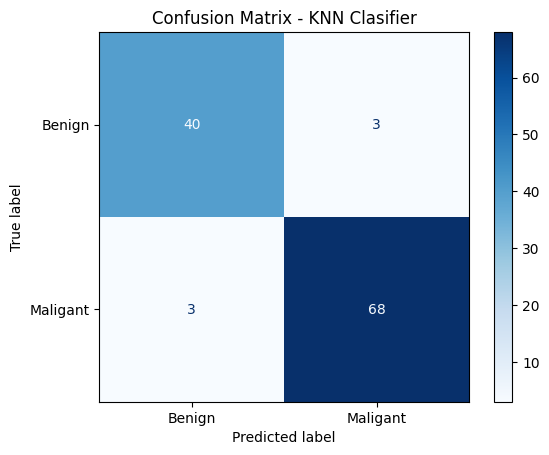

In [89]:
cm_knn = confusion_matrix(y_test, y_predict_knn)
disp_knn = ConfusionMatrixDisplay(confusion_matrix = cm_knn, display_labels = ['Benign', 'Maligant'])
disp_knn.plot(cmap = 'Blues')
plt.title('Confusion Matrix - KNN Clasifier')

Used default settings

Also made a prediction on the test dataset

In [90]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

y_predict_logreg = logreg.predict(x_test)
accuracy_logreg = accuracy_score(y_test, y_predict_logreg)

print(f"Logistic Regression model accuracy: {accuracy_logreg * 100:.2f}%")

Logistic Regression model accuracy: 97.37%


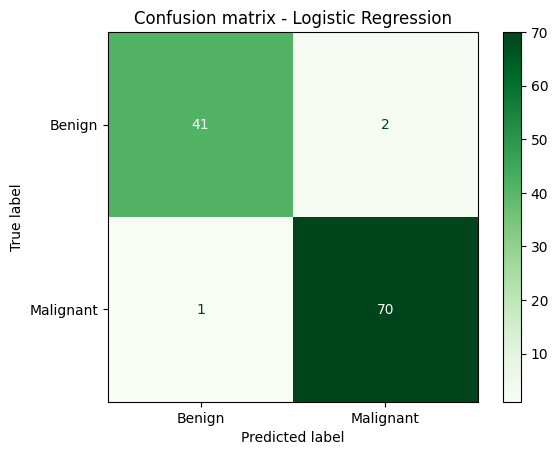


Comparison of Model Accuracies:
KNN Accuracy: 94.74%
Logistic Regresion Accuracy: 97.37%


In [91]:
cm_logreg = confusion_matrix(y_test, y_predict_logreg)
disp_logreg = ConfusionMatrixDisplay(confusion_matrix = cm_logreg, display_labels = ['Benign', 'Malignant'])
disp_logreg.plot(cmap = 'Greens')
plt.title('Confusion matrix - Logistic Regression')
plt.show()

print(f"\nComparison of Model Accuracies:\n"
f"KNN Accuracy: {accuracy_knn * 100:.2f}%\n"
f"Logistic Regresion Accuracy: {accuracy_logreg * 100:.2f}%")

Evaluation

Here i calculate the Accuracy, precision, recall and f1 scores

Diplayed the confusion matrix for both KNN and logistic regression to show the details.

Evaluation of KNN Classifier:
Accuracy: 94.74%
Precision: 95.77%
Recall: 95.77%
F1: 95.77%




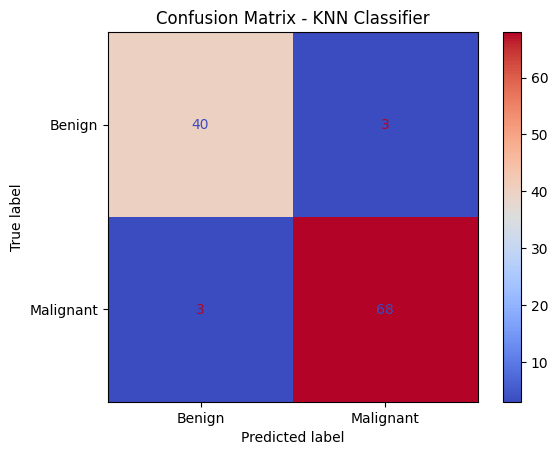

Evaluation of Logistic Regression:
Accuracy: 97.37%
Precision: 97.22%
Recall: 98.59%
F1: 97.90%




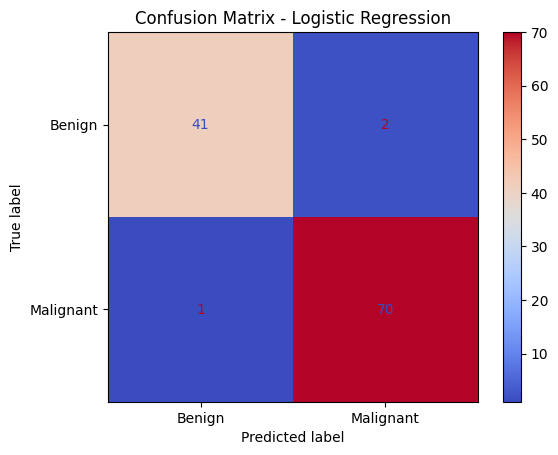

In [92]:
def evaluate_model(y_true, y_predict, name):
  accuracy = accuracy_score(y_true, y_predict)
  precision = precision_score(y_true, y_predict)
  recall = recall_score(y_true, y_predict)
  f1 = f1_score(y_true, y_predict)

  print(f"Evaluation of {name}:")
  print(f"Accuracy: {accuracy * 100:.2f}%")
  print(f"Precision: {precision * 100:.2f}%")
  print(f"Recall: {recall * 100:.2f}%")
  print(f"F1: {f1 * 100:.2f}%")
  print("\n")
  cm = confusion_matrix(y_true, y_predict)
  disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Benign', 'Malignant'])
  disp.plot(cmap = 'coolwarm')
  plt.title(f'Confusion Matrix - {name}')
  plt.show()

y_predict_knn = knn.predict(x_test)
evaluate_model(y_test, y_predict_knn, "KNN Classifier")

y_predict_logreg = logreg.predict(x_test)
evaluate_model(y_test, y_predict_logreg, "Logistic Regression")